In [1]:
import os

from pathlib import Path

import matplotlib.pyplot as plt

from lhotse.recipes.mini_librispeech import download_and_untar, prepare_mini_librispeech
from lhotse.features import Fbank, FeatureSetBuilder
from lhotse.cut import make_cuts_from_supervisions_features
from lhotse.dataset.speech_recognition import SpeechRecognitionDataset

# Settings for paths

In [2]:
root_dir = Path('data')
corpus_dir = root_dir / 'LibriSpeech'
output_dir = root_dir / 'mini_librispeech_nb'

# Download and untar

In [3]:
download_and_untar(root_dir)

# Prepare audio and supervision manifests

In [4]:
mini_librispeech_manifests = prepare_mini_librispeech(corpus_dir, output_dir)

# Extract features

In [5]:
for partition, manifests in mini_librispeech_manifests.items():
    feature_set_builder = FeatureSetBuilder(
        feature_extractor=Fbank(),
        output_dir=f'{output_dir}/feats_{partition}'
    )
    feature_set = feature_set_builder.process_and_store_recordings(
        recordings=manifests['audio'],
        num_jobs=os.cpu_count()
    )
    mini_librispeech_manifests[partition]['feats'] = feature_set

    cut_set = make_cuts_from_supervisions_features(manifests['supervisions'], feature_set)
    mini_librispeech_manifests[partition]['cuts'] = cut_set
    cut_set.to_yaml(output_dir / f'cuts_{partition}.yml')

# Make pytorch Dataset

In [6]:
cuts_dev = SpeechRecognitionDataset(mini_librispeech_manifests['dev-clean-2']['cuts'])
cuts_train = SpeechRecognitionDataset(mini_librispeech_manifests['train-clean-5']['cuts'])

# Illustation of an example

IF THE READER WILL EXCUSE ME I WILL SAY NOTHING OF MY ANTECEDENTS NOR OF THE CIRCUMSTANCES WHICH LED ME TO LEAVE MY NATIVE COUNTRY THE NARRATIVE WOULD BE TEDIOUS TO HIM AND PAINFUL TO MYSELF


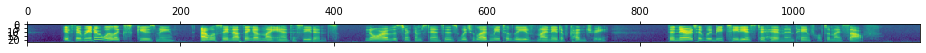

In [7]:
sample = cuts_dev[0]
print(sample['text'])
plt.matshow(sample['features'].transpose(0, 1).flip(0))